##   1. Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

In [3]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

## 2. Loading the dataset

In [4]:
dataset = pd.read_csv('Fraud.csv')

# Just to take a glimpse of the dataset
dataset 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## 3. Exploratory Data Analysis

### 3.1. Checking for missing values

In [5]:
# Checking for missing values

print(dataset.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Apparently we see that there are no missing values, but from the problem statement we know that balances of merchant's should be different from 0, which are actually kept 0 as no information about their accounts are obtained.

### 3.2. Brief description of the dataset

In [6]:
# A brief description of the dataset

pd.set_option('display.float_format', '{:.2f}'.format)
dataset.describe(include = 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620,6362620.00,6362620,6362620.00,6362620.00,6362620,6362620.00,6362620.00,6362620.00,6362620.00
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,243.40,NaN,179861.90,NaN,833883.10,855113.67,NaN,1100701.67,1224996.40,0.00,0.00
std,142.33,NaN,603858.23,NaN,2888242.67,2924048.50,NaN,3399180.11,3674128.94,0.04,0.00
min,1.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00
25%,156.00,NaN,13389.57,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00
50%,239.00,NaN,74871.94,NaN,14208.00,0.00,NaN,132705.66,214661.44,0.00,0.00
75%,335.00,NaN,208721.48,NaN,107315.18,144258.41,NaN,943036.71,1111909.25,0.00,0.00


#### Inferences from the data

1. We see that 'type', 'nameOrig', 'nameDest' are categorical features while the rest are of numerical type.
2. 'type' has 5 categories with 'CASH_OUT' as the most frequently occured feature. Encoding is possible.
3. 'nameOrig' and 'nameDest' has over 6 millions and 2 millions character respectively. Encoding is useless.

### 3.3. Fraudulent transactions in each category of 'type'

In [7]:
# Taking a look at the number of fraudulent transactions in each category of 'type'

groups = dataset.groupby(['type', 'isFraud']).count()['step']
print(groups)

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: step, dtype: int64


We can see from this that Fraudulent transactions only occur in 'CASH_OUT' and 'TRANSFER' transactions.

In [8]:
# Printing the number of valid and fraud transactions
print('A Summary of the type of transactions :')
print()
print('Total number of transactions =', groups[:, :].sum())
print('Total number of valid transactions =', groups[:, 0].sum(), 'i.e.', round(groups[:, 0].sum()/groups[:, :].sum()*100,2), '%')
print('Total number of fraudulent transactions =', groups[:, 1].sum(), 'i.e.', round(groups[:, 1].sum()/groups[:, :].sum()*100,2), '%')

A Summary of the type of transactions :

Total number of transactions = 6362620
Total number of valid transactions = 6354407 i.e. 99.87 %
Total number of fraudulent transactions = 8213 i.e. 0.13 %


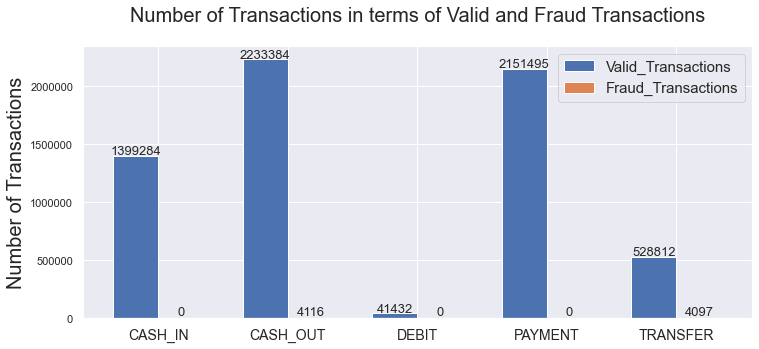

In [9]:
# Plotting the number of transactions vs type of transaction

valid_trans = groups[:, 0].values
fraud_trans = [groups[k, 1] if len(groups[k]) == 2 else 0 for k in np.array(groups[:,0].index)]

labels = np.array(groups[:,0].index)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
ax.ticklabel_format(style='plain')

rects1 = ax.bar(x - width/2, valid_trans, width, label='Valid_Transactions')
rects2 = ax.bar(x + width/2, fraud_trans, width, label='Fraud_Transactions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Transactions', fontsize = 20)
ax.set_title('Number of Transactions in terms of Valid and Fraud Transactions', fontsize = 20, pad = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
ax.legend(fontsize = 15)

ax.bar_label(rects1, fontsize = 13, padding = -1.5, fmt = '%d')
ax.bar_label(rects2, fontsize = 13, fmt = '%d')

plt.show()

From the plot also it is clear that Fraudulent transactions occur only in 'CASH_OUT' and 'TRANSFER' transactions.

### 3.4. Business model - 'isFlaggedFraud'

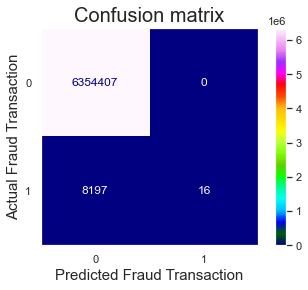

In [10]:
# Let us now check the business model performance by comparing isFlaggedFraud with isFraud

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(dataset['isFraud'], dataset['isFlaggedFraud'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='gist_ncar', values_format = '.0f')
disp.ax_.grid(False)
plt.title('Confusion matrix', fontsize = 20)
plt.ylabel('Actual Fraud Transaction', fontsize = 15)
plt.xlabel('Predicted Fraud Transaction', fontsize = 15)
plt.show()

We can see from the confusion matrix that:
1) There are 6354407 valid transactions and the business model predicted all as valid.

2) The business model predicted 8197 fraud transactions incorrectly as valid transactions and predicted only 16 fraud transactions correctly.

So we can see that the cutoff measure to classify any transaction of 200000 or more as fraudulent transaction by the business model is not sufficient to correctly predict fraudulent transactions.

So we can conclude that 'isFlaggedFraud' is not a suitable variable to predict 'isFraud'.

### 3.5. 'step' feature

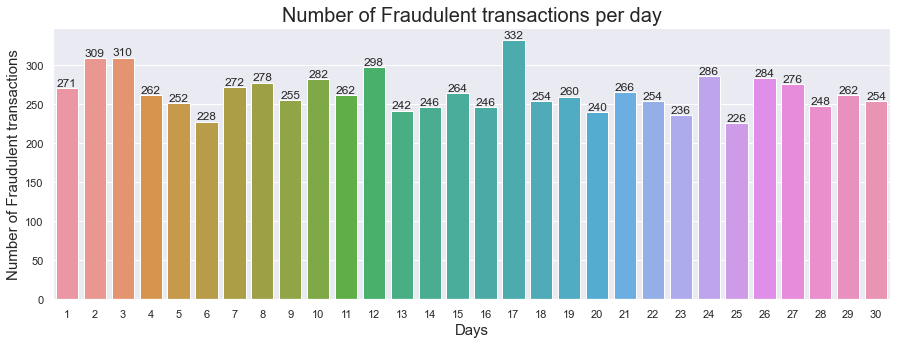

In [11]:
# Let us now look at the 'step' feature. 'step' maps a unit of time in the real world. In this case, 1 step is 1 hour of time.
# Lets take a look at the amount of fraudulent transactions each day for a period of 30 days.

step_groups = dataset.groupby(['step', 'isFraud']).count()['type']
step_range = np.array(range(0, 745, 24))
days = np.array(range(1, 31, 1))
fraud_transactions = []
for count in range(len(days)):
    val = step_groups[:, 1].iloc[step_range[count]:step_range[count+1]].sum()
    fraud_transactions.append(val)

    
plt.figure(figsize = (15, 5))
plt.title('Number of Fraudulent transactions per day', fontsize = 20)
splot = sns.barplot(x = days, y = fraud_transactions)
plt.bar_label(splot.containers[0])
plt.ylabel('Number of Fraudulent transactions', fontsize = 15)
plt.xlabel('Days', fontsize = 15)

plt.show()

We can see from this plot that everyday there are almost same fraudulent transactions going on. So we can say that 'step' is not a good feature for predicting fraudulent transactions

### 3.6. Amounts of Fraudulent Transactions - 'amount'

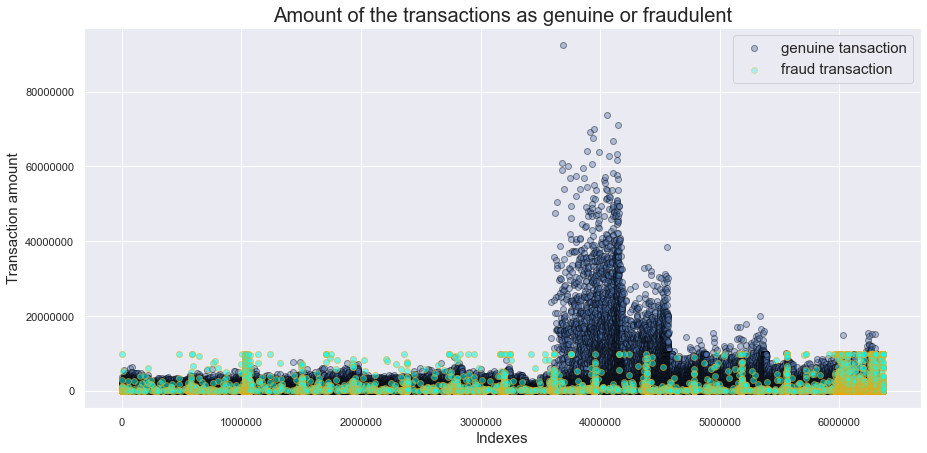

In [12]:
# Let us now check the amounts of Fraudulent Transactions

fraud = dataset[dataset['isFraud'] == 1]['amount']
genuine = dataset[dataset['isFraud'] == 0]['amount']

fig, ax = plt.subplots(figsize=(15, 7))
ax.ticklabel_format(style='plain')

plt.title('Amount of the transactions as genuine or fraudulent', fontsize = 20)
plt.scatter(x = np.array(genuine.index), y = genuine, alpha = 0.4, edgecolors = 'black', label = 'genuine tansaction')
plt.scatter(x = np.array(fraud.index), y = fraud, alpha = 0.3, c = 'cyan', edgecolors = 'orange', label = 'fraud transaction')
plt.xlabel('Indexes', fontsize = 15)
plt.ylabel('Transaction amount', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [13]:
print('Maximum Fraudulent transaction amount =', max(fraud))
print('Minimum Fraudulent transaction amount =', min(fraud))
print('Number of Fraudulent transactions in which the amount is 0 =', sum(fraud == 0))

Maximum Fraudulent transaction amount = 10000000.0
Minimum Fraudulent transaction amount = 0.0
Number of Fraudulent transactions in which the amount is 0 = 16


We can see from the above plot and data that there are some fraud transactions with transaction amount = 0. So let us have a look at those transactions.

Also we can see that there are no fraudulent trasactions above 10000000.

In [14]:
# All unsuccessfull fraud transaction attempts

dataset.iloc[dataset[dataset['amount'] == 0].index, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.00,C1510987794,0.00,0.00,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.00,C521393327,0.00,0.00,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.00,C539112012,0.00,0.00,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.00,C1294472700,0.00,0.00,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.00,C832555372,0.00,0.00,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.00,C69493310,0.00,0.00,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.00,C10965156,0.00,0.00,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.00,C1303719003,0.00,0.00,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.00,C1971175979,0.00,0.00,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.00,C2060908932,0.00,0.00,C1587892888,0.00,0.00,1,0


So after looking at the data, I think that these are some failed fraud transaction attempts. The fraud attempts failed due to 0 balance in the target accounts, as we can see from the 'oldbalanceOrg' column. Also we can see that all those attemps were of 'type' = 'CASH_OUT'.

### 3.7. 'nameOrig' and 'nameDest'

In [15]:
# Let us now take a look at the 'nameOrig' and 'nameDest' features.

print('Total number of transactions =', dataset.shape[0])
print("Number of unique 'nameOrig' names =", len(dataset['nameOrig'].unique()))
print("Number of unique 'nameDest' names =", len(dataset['nameDest'].unique()))

Total number of transactions = 6362620
Number of unique 'nameOrig' names = 6353307
Number of unique 'nameDest' names = 2722362


We can see from the above that there are some common destination accounts for some transactions.

Let us now take a look at those common destination accounts if they are accounts of frauds or not.

In [16]:
fraud_df = dataset[dataset['isFraud'] == 1]
dest_accounts = fraud_df.loc[:, ['type', 'amount', 'nameDest']]
dest_accounts

,type,amount,nameDest
2,TRANSFER,181.00,C553264065
3,CASH_OUT,181.00,C38997010
251,TRANSFER,2806.00,C972765878
252,CASH_OUT,2806.00,C1007251739
680,TRANSFER,20128.00,C1848415041
...,...,...,...
6362615,CASH_OUT,339682.13,C776919290
6362616,TRANSFER,6311409.28,C1881841831
6362617,CASH_OUT,6311409.28,C1365125890
6362618,TRANSFER,850002.52,C2080388513


The above dataframe consists of all the destination accounts associated with fraudulent behavior. So these accounts need to be monitored or blocked to prevent/avoid fraud transactions.

## 4. Data Cleaning

### 4.1. Feature Selection

From the EDA part we came to a conclusion that 'step', 'nameOrig', 'nameDest' and 'isFlaggedFraud' are not useful features for predicting Fraudulent behaviors.

Also, Fraudulent Transactions only occur in transactions of 'type' - 'CASH_OUT' and 'TRANSFER". So we will use only those transactions to create our model.

In [17]:
cleaned_dataset = dataset.drop(columns = ['step', 'nameOrig', 'nameDest', 'isFlaggedFraud' ])
cleaned_dataset = cleaned_dataset.loc[(dataset.type == 'TRANSFER') | (dataset.type == 'CASH_OUT')]
cleaned_dataset.reset_index(inplace = True, drop = True)
# cleaned_dataset

### 4.2. Handling Missing values or Incorrect values

In [18]:
cleaned_dataset['diff_balanceOrig'] = cleaned_dataset.oldbalanceOrg - cleaned_dataset.newbalanceOrig
cleaned_dataset['diff_balanceDest'] = cleaned_dataset.oldbalanceDest - cleaned_dataset.newbalanceDest
cleaned_dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diff_balanceOrig,diff_balanceDest
0,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
2,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,15325.00,-46430.44
3,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,705.00,22425.00
4,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0,10835.00,-2712905.89


From the above data it seems some data are misleading as the amounts of some transactions do not match with the difference between the Old balance and the New balance, whether it may be sender account or recepient account.

So we need to fix those errors.

In [19]:
''' Replacing the 'amount' column with 'diff_balanceOrig'. The reason for doing this is that the transaction amount doesnot 
    match with the difference of the balances before and after the transaction of senders account.
'''

cleaned_dataset['amount'] = cleaned_dataset['diff_balanceOrig']

In [20]:
''' Replacing the 'newbalanceDest' column with the sum of 'amount' and 'oldbalanceDest'. The reason for doing this is that the transaction amount doesnot 
    match with the difference of the balances before and after the transaction of recipient account.
'''

cleaned_dataset['newbalanceDest'] = cleaned_dataset['amount'] + cleaned_dataset['oldbalanceDest']

In [21]:
# We now can remove the 'diff_balanceOrig' and 'diff_balanceDest' columns.

cleaned_dataset.drop(columns = ['diff_balanceOrig', 'diff_balanceDest'], inplace = True)
cleaned_dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.00,0.00,0.00,181.00,1
1,CASH_OUT,181.00,181.00,0.00,21182.00,21363.00,1
2,CASH_OUT,15325.00,15325.00,0.00,5083.00,20408.00,0
3,TRANSFER,705.00,705.00,0.00,22425.00,23130.00,0
4,TRANSFER,10835.00,10835.00,0.00,6267.00,17102.00,0


### 4.3. Creating labels for the categorical variable 'type'

In [22]:
# Let us now encode our categorical variable 'type'

cleaned_dataset['type'] = cleaned_dataset['type'].map({'TRANSFER' : 0, 'CASH_OUT' : 1})

### 4.4. Correlation Plot

In [23]:
cleaned_dataset.corr()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.00,-0.04,-0.01,0.02,-0.10,-0.10,-0.04
amount,-0.04,1.00,0.82,0.27,-0.02,0.02,0.47
oldbalanceOrg,-0.01,0.82,1.00,0.78,-0.02,0.01,0.35
newbalanceOrig,0.02,0.27,0.78,1.00,-0.01,-0.00,0.06
oldbalanceDest,-0.10,-0.02,-0.02,-0.01,1.00,1.00,-0.01
newbalanceDest,-0.10,0.02,0.01,-0.00,1.00,1.00,0.00
isFraud,-0.04,0.47,0.35,0.06,-0.01,0.00,1.00


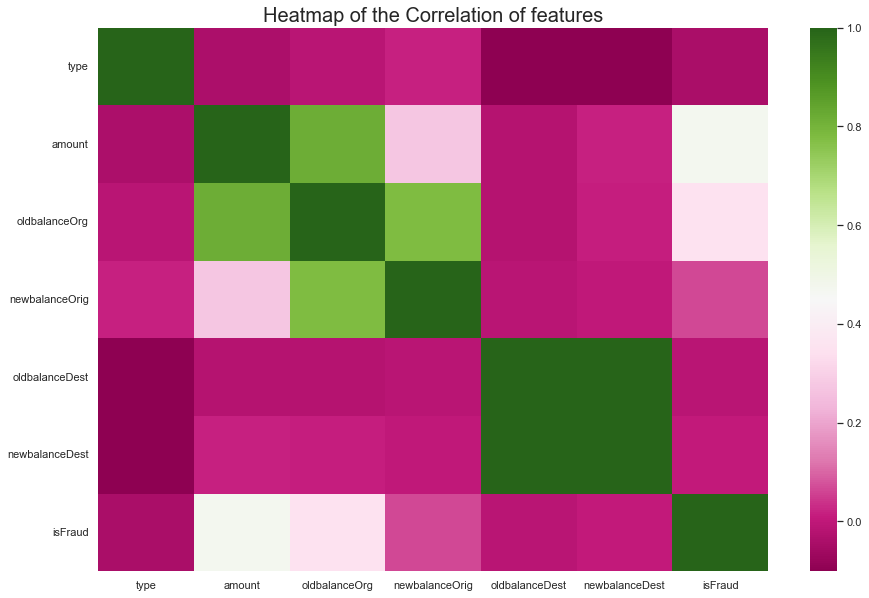

In [24]:
plt.figure(figsize = (15,10))
plt.title('Heatmap of the Correlation of features', fontsize = 20)
sns.heatmap(cleaned_dataset.corr(), cmap = 'PiYG')
plt.show()

We can see from this plot that 'amount', 'oldbalanceOrg' and 'newbalanceOrig' are highly correlated with each other.

We can also see that 'oldbalanceDest' and 'newbalanceDest' are totally correlated with each other.

Also 'amount' and 'oldbalanceOrg' has some correlation with 'isFraud'.

## 5. Modelling

### 5.1. Declaring the variables

In [29]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

### 5.2. Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 6)

### 5.3. Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5.4. Model

In [32]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\sumu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 5.5. Confusion matrix and accuracy score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[552339     74]
 [   912    757]]


0.998220480001155